<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

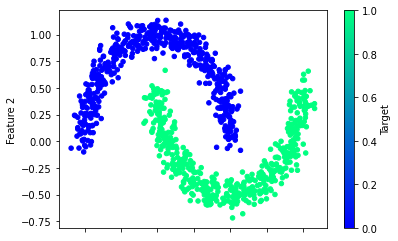

In [1]:
# import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

from sklearn.datasets import make_moons

# create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# create a dataframe to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df_moons['Target'] = y_moons

# plot the nonlinear dummy data
df_moons.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [2]:
from sklearn.model_selection import train_test_split

# create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_moon_scaler.fit(X_moon_train)

# scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [3]:
# create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

# add the output layer that uses a probability activation function for classification
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [4]:
# compile the Sequential model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# train the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 640us/step - loss: 1.0477 - accuracy: 0.2760
Epoch 2/100
24/24 [==============================] - 0s 565us/step - loss: 1.0147 - accuracy: 0.2587
Epoch 3/100
24/24 [==============================] - 0s 561us/step - loss: 0.9852 - accuracy: 0.2680
Epoch 4/100
24/24 [==============================] - 0s 741us/step - loss: 0.9571 - accuracy: 0.2680
Epoch 5/100
24/24 [==============================] - 0s 758us/step - loss: 0.9325 - accuracy: 0.2813
Epoch 6/100
24/24 [==============================] - 0s 709us/step - loss: 0.9101 - accuracy: 0.2813
Epoch 7/100
24/24 [==============================] - 0s 848us/step - loss: 0.8897 - accuracy: 0.2920
Epoch 8/100
24/24 [==============================] - 0s 766us/step - loss: 0.8715 - accuracy: 0.2907
Epoch 9/100
24/24 [==============================] - 0s 798us/step - loss: 0.8550 - accuracy: 0.3000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8407 - accuracy

24/24 [==============================] - 0s 748us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 82/100
24/24 [==============================] - 0s 652us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 83/100
24/24 [==============================] - 0s 719us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 656us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 703us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 703us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 688us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 703us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 710us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 764us/step - loss: 0.6913 - accuracy: 

<AxesSubplot:>

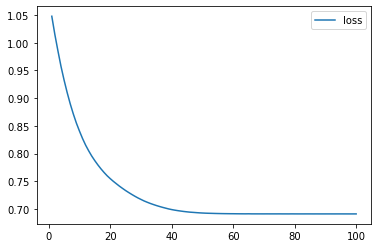

In [6]:
# create a dataframe containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1, len(model_moon.history['loss'])+1))

# plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

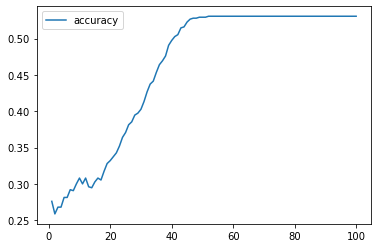

In [7]:
# plot the accuracy
history_df.plot(y='accuracy')

## increase the number of neurons

In [8]:
# generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [9]:
# add the input and hidden layers
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

# add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
# compile the sequential model together and customize metrics
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 751us/step - loss: 0.6129 - accuracy: 0.7747
Epoch 2/100
24/24 [==============================] - 0s 677us/step - loss: 0.5901 - accuracy: 0.7973
Epoch 3/100
24/24 [==============================] - 0s 679us/step - loss: 0.5670 - accuracy: 0.8133
Epoch 4/100
24/24 [==============================] - 0s 660us/step - loss: 0.5439 - accuracy: 0.8213
Epoch 5/100
24/24 [==============================] - 0s 714us/step - loss: 0.5205 - accuracy: 0.8267
Epoch 6/100
24/24 [==============================] - 0s 619us/step - loss: 0.4976 - accuracy: 0.8360
Epoch 7/100
24/24 [==============================] - 0s 608us/step - loss: 0.4742 - accuracy: 0.8427
Epoch 8/100
24/24 [==============================] - 0s 596us/step - loss: 0.4514 - accuracy: 0.8493
Epoch 9/100
24/24 [==============================] - 0s 652us/step - loss: 0.4292 - accuracy: 0.8533
Epoch 10/100
24/24 [==============================] - 0s 609us/step - loss: 0.4082 - accura

24/24 [==============================] - 0s 725us/step - loss: 0.2325 - accuracy: 0.9000
Epoch 82/100
24/24 [==============================] - 0s 705us/step - loss: 0.2317 - accuracy: 0.9000
Epoch 83/100
24/24 [==============================] - 0s 699us/step - loss: 0.2309 - accuracy: 0.9000
Epoch 84/100
24/24 [==============================] - 0s 797us/step - loss: 0.2301 - accuracy: 0.9013
Epoch 85/100
24/24 [==============================] - 0s 689us/step - loss: 0.2295 - accuracy: 0.9027
Epoch 86/100
24/24 [==============================] - 0s 633us/step - loss: 0.2286 - accuracy: 0.9027
Epoch 87/100
24/24 [==============================] - 0s 696us/step - loss: 0.2277 - accuracy: 0.9027
Epoch 88/100
24/24 [==============================] - 0s 653us/step - loss: 0.2268 - accuracy: 0.9040
Epoch 89/100
24/24 [==============================] - 0s 662us/step - loss: 0.2260 - accuracy: 0.9040
Epoch 90/100
24/24 [==============================] - 0s 623us/step - loss: 0.2250 - accuracy: 

<AxesSubplot:>

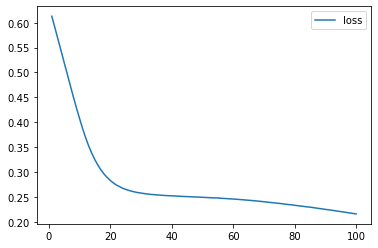

In [11]:
# create a dataframe containing training history
new_history_df = pd.DataFrame(new_fit_model.history, index=range(1, len(new_fit_model.history['loss'])+1))

# plot the loss
new_history_df.plot(y='loss')

<AxesSubplot:>

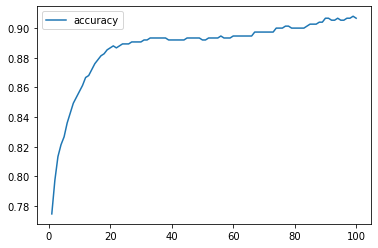

In [12]:
# plot the accuracy
new_history_df.plot(y='accuracy')